In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform # 운영체제 확인을 위한 모듈
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10]) 

356
['C:\\Windows\\Fonts\\LTYPEBO.TTF', 'C:\\Windows\\Fonts\\calibri.ttf', 'C:\\Windows\\Fonts\\LTYPEB.TTF', 'C:\\Windows\\Fonts\\ROCCB___.TTF', 'C:\\Windows\\Fonts\\COOPBL.TTF', 'C:\\Windows\\Fonts\\OLDENGL.TTF', 'C:\\Windows\\Fonts\\PERBI___.TTF', 'C:\\Windows\\Fonts\\trebucit.ttf', 'C:\\Windows\\Fonts\\phagspa.ttf', 'C:\\Windows\\Fonts\\Candarali.ttf']


In [24]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_path = r'C:/Windows/Fonts/H2GTRM.TTF' # HY견명조 폰트 경로

# 2. FontProperties 객체 생성
font_prop = fm.FontProperties(fname=font_path).get_name()

# 3. 마이너스 부호 설정 (필요한 경우)
plt.rc('font', family=font_prop)

plt.rc('axes', unicode_minus=False)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

EDA과정

In [20]:
#Date -> date 타입으로 변환 및 index화
rate_ocean_final = pd.read_csv('data/rate_ocean_final.csv')
rate_ocean_final['Date']=pd.to_datetime(rate_ocean_final['Date'])
rate_ocean_final.set_index('Date',inplace=True)
print(rate_ocean_final.index)

DatetimeIndex(['2011-03-05', '2011-03-12', '2011-03-19', '2011-03-26',
               '2011-04-02', '2011-04-09', '2011-04-16', '2011-04-23',
               '2011-04-30', '2011-05-07',
               ...
               '2024-11-30', '2024-12-07', '2024-12-14', '2024-12-21',
               '2024-12-28', '2025-01-04', '2025-01-11', '2025-01-18',
               '2025-01-25', '2025-02-01'],
              dtype='datetime64[ns]', name='Date', length=727, freq=None)


In [73]:
rate_ocean_final

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,염분_100m,염분_200m,염분_300m,염분_400m,염분_500m,해저수온_100m,해저수온_200m,해저수온_300m,해저수온_400m,해저수온_500m,해수유속(E)_50m,해수유속(E)_100m,해수유속(N)_50m,해수유속(N)_100m,mean_해수면높이,mean_혼합층 깊이,클로로필_50m,클로로필_100m,클로로필_200m,클로로필_300m,클로로필_400m,클로로필_500m,질산염_50m,질산염_100m,질산염_200m,질산염_300m,용존 산소_50m,용존 산소_300m,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec),Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-03-05,62.7,7.6,6.8,4.1,3.2,15.6,37872.0,0,34.087777,34.056530,33.998532,34.021699,34.043398,34.054430,8.430170,5.467742,2.618654,1.170916,0.867136,0.020201,0.016816,0.013214,0.026537,0.071283,69.394428,0.787878,0.630299,0.176415,0.009291,0.005690,0.003903,2.312442,2.497377,5.765339,12.658205,268.795296,223.421580,0.215291,3.534436,0.058370,5.420000,1018.220000,60.000000,4.100000,2.360000,3.680000,4
2011-03-12,48.5,1.6,3.4,2.4,37.8,6.3,79934.0,0,34.115109,34.077639,34.001785,34.018991,34.047063,34.056045,8.491552,5.519979,2.705634,1.205661,0.873943,0.027144,0.015612,-0.000573,0.022561,0.069657,67.445616,0.902343,0.792334,0.222780,0.009205,0.005656,0.003886,2.290076,2.399688,5.622701,12.710857,270.525949,223.181014,0.211455,3.449480,0.076118,6.785714,1017.542857,53.142857,6.257143,1.957143,2.828571,4
2011-03-19,69.8,7.0,5.0,2.5,5.6,10.1,64910.0,0,34.147962,34.108084,34.009749,34.015069,34.051084,34.058287,8.585788,5.478662,2.605231,1.209041,0.862841,0.025774,0.012881,-0.000526,0.018035,0.065963,44.779587,1.021909,0.804151,0.226235,0.009077,0.005589,0.003857,2.144729,2.286441,5.485076,12.828418,273.818986,222.804057,0.199250,3.302852,0.070423,6.771429,1017.828571,68.000000,7.457143,2.442857,3.371429,4
2011-03-26,75.1,0.5,5.0,2.6,6.4,10.4,53873.0,0,34.173486,34.129434,34.007560,34.009586,34.054175,34.060754,8.613840,5.196027,2.346879,1.180908,0.810952,0.012690,0.010026,0.001250,0.016631,0.055197,48.022201,1.022426,0.767086,0.205912,0.008962,0.005527,0.003833,2.005141,2.165133,5.400758,12.942292,276.042149,222.491197,0.190536,3.145752,0.067224,6.600000,1019.700000,64.000000,6.042857,2.257143,2.971429,4
2011-04-02,80.0,0.0,4.9,5.0,0.8,9.3,86681.0,0,34.210325,34.145569,34.013618,34.013640,34.054826,34.062866,8.449639,4.866995,2.045112,1.085696,0.740865,0.025123,0.012263,0.002662,0.012837,0.050113,26.802040,1.313308,0.634303,0.170270,0.008844,0.005468,0.003810,1.583664,2.070857,5.390996,13.072908,281.167243,222.124141,0.158720,2.854243,0.078502,5.171429,1021.400000,64.000000,9.100000,1.357143,2.728571,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-04,55.5,1.3,29.1,8.7,0.7,4.7,80427.0,0,33.642911,33.844457,34.130325,34.058083,34.057829,34.057067,12.923927,6.768378,1.013735,0.480097,0.290103,0.009438,-0.000865,0.020897,0.042291,0.305960,74.884954,0.665655,0.615976,0.111499,0.008884,0.005645,0.004411,1.963809,2.087021,6.524281,13.475948,237.796567,211.669197,0.174976,3.279040,0.041901,9.400000,1020.485714,62.142857,7.742857,2.600000,5.028571,2
2025-01-11,55.0,2.5,27.2,9.0,0.5,5.8,57854.0,0,33.724002,33.837401,34.110579,34.054461,34.055892,34.056764,12.452550,6.553770,1.023831,0.502683,0.285548,0.005698,-0.010534,0.005515,0.035638,0.290507,81.053557,0.613354,0.580940,0.139892,0.008859,0.005636,0.004412,2.088572,2.158666,6.233956,13.411785,241.396973,211.980281,0.187914,3.278713,0.039323,9.400000,1018.514286,59.000000,4.685714,4.000000,5.785714,2
2025-01-18,51.6,7.4,30.8,3.5,0.6,6.1,86373.0,0,33.768318,33.842817,34.097062,34.052420,34.055540,34.056862,11.905319,6.273464,1.058974,0.518791,0.281510,0.009089,-0.001856,0.015080,0.033940,0.239657,82.485847,0.597976,0.568696,0.147435,0.008741,0.005622,0.004406,2.188058,2.222633,6.102129,13.391594,245.076476,212.160091,0.197564,3.287962,0.041826,9.400000,1021.900000,59.000000,7.042857,2.700000,4.914286,2


In [54]:
col1=rate_ocean_final.iloc[:,:6] #어류
col2=rate_ocean_final['총어획량 ']
col3=rate_ocean_final.iloc[:,8:14] #염분
col4=rate_ocean_final.iloc[:,14:19] #해저수온
col5=rate_ocean_final.iloc[:,19:23] #해저유속
col6=rate_ocean_final['mean_해수면높이'] 
col7=rate_ocean_final['mean_혼합층 깊이']
col8=rate_ocean_final.iloc[:,25:31] #클로로필
col9=rate_ocean_final.iloc[:,31:35] #질산염
col10=rate_ocean_final[['용존 산소_50m','용존 산소_300m']]


In [46]:
pd.set_option('display.max_columns',50)
rate_ocean_final.columns

Index(['가자미류', '청어', '새우', '대구', '도루묵', '기타어류', '총어획량 ', '금지여부', '염분_50m',
       '염분_100m', '염분_200m', '염분_300m', '염분_400m', '염분_500m', '해저수온_100m',
       '해저수온_200m', '해저수온_300m', '해저수온_400m', '해저수온_500m', '해수유속(E)_50m',
       '해수유속(E)_100m', '해수유속(N)_50m', '해수유속(N)_100m', 'mean_해수면높이',
       'mean_혼합층 깊이', '클로로필_50m', '클로로필_100m', '클로로필_200m', '클로로필_300m',
       '클로로필_400m', '클로로필_500m', '질산염_50m', '질산염_100m', '질산염_200m', '질산염_300m',
       '용존 산소_50m', '용존 산소_300m', ' 인산염_50m', '규산염_50m', 'mean_광확산 감쇠 계수',
       '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 최대 파고(m)',
       '평균 파주기(sec)', 'Target'],
      dtype='object')

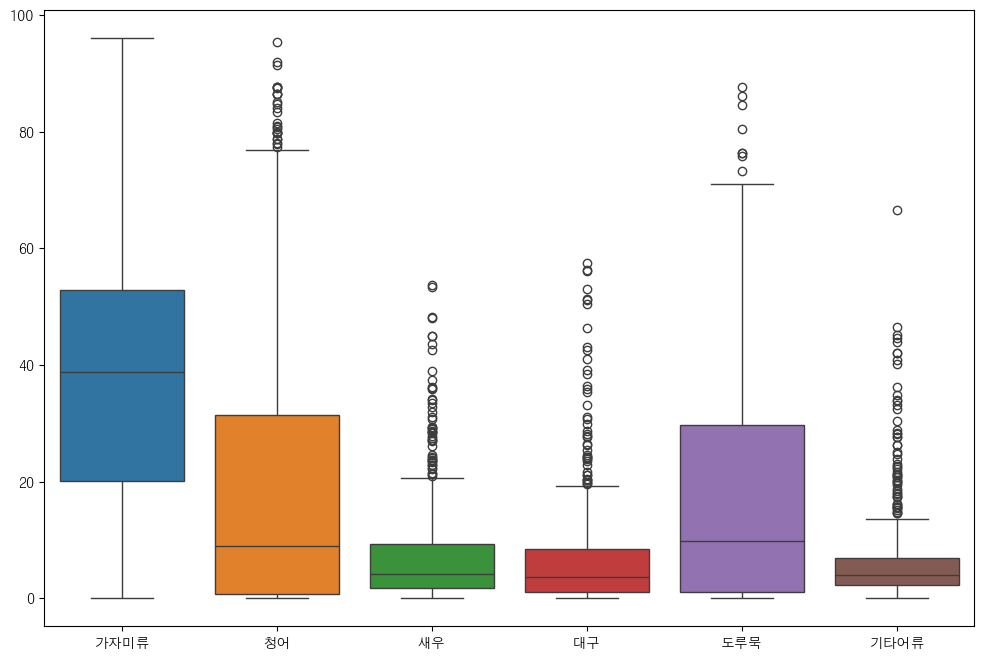

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col1)
plt.show()

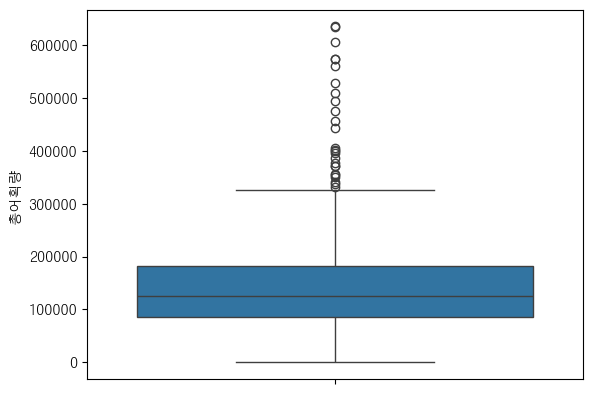

In [34]:
sns.boxplot(data=col2)
plt.show()

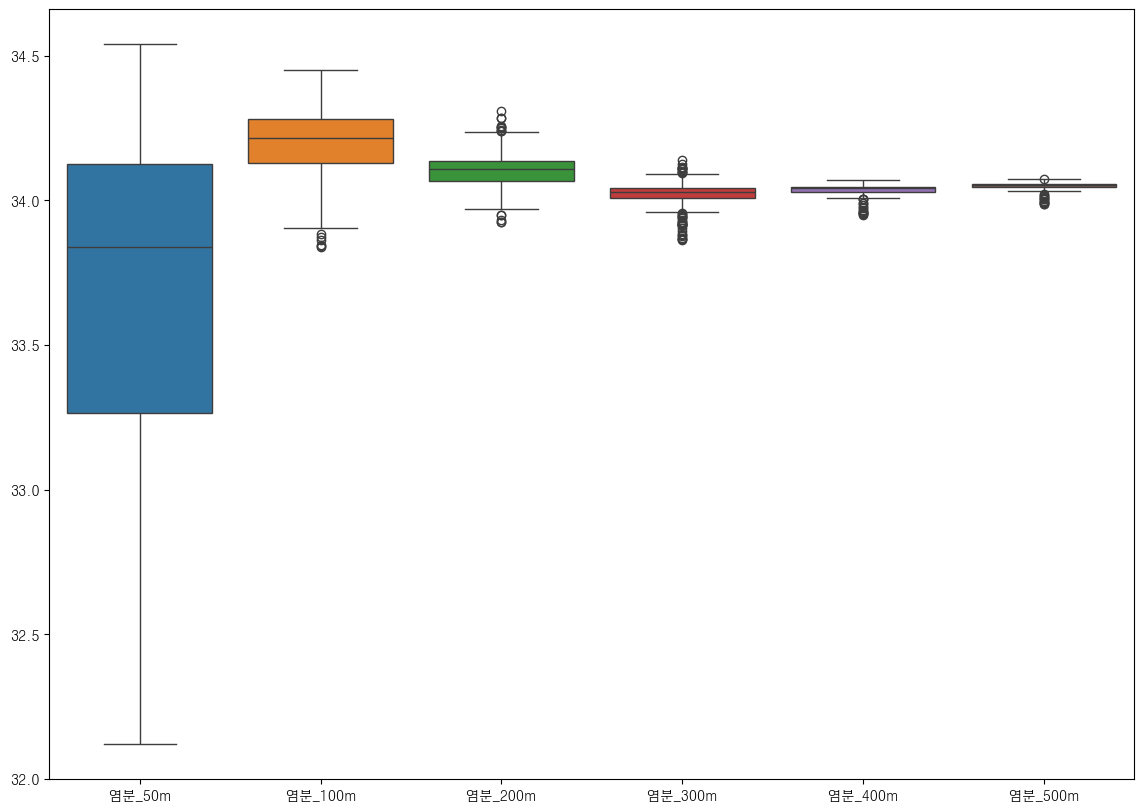

In [39]:
plt.figure(figsize=(14,10))
sns.boxplot(data=col3)
plt.show()

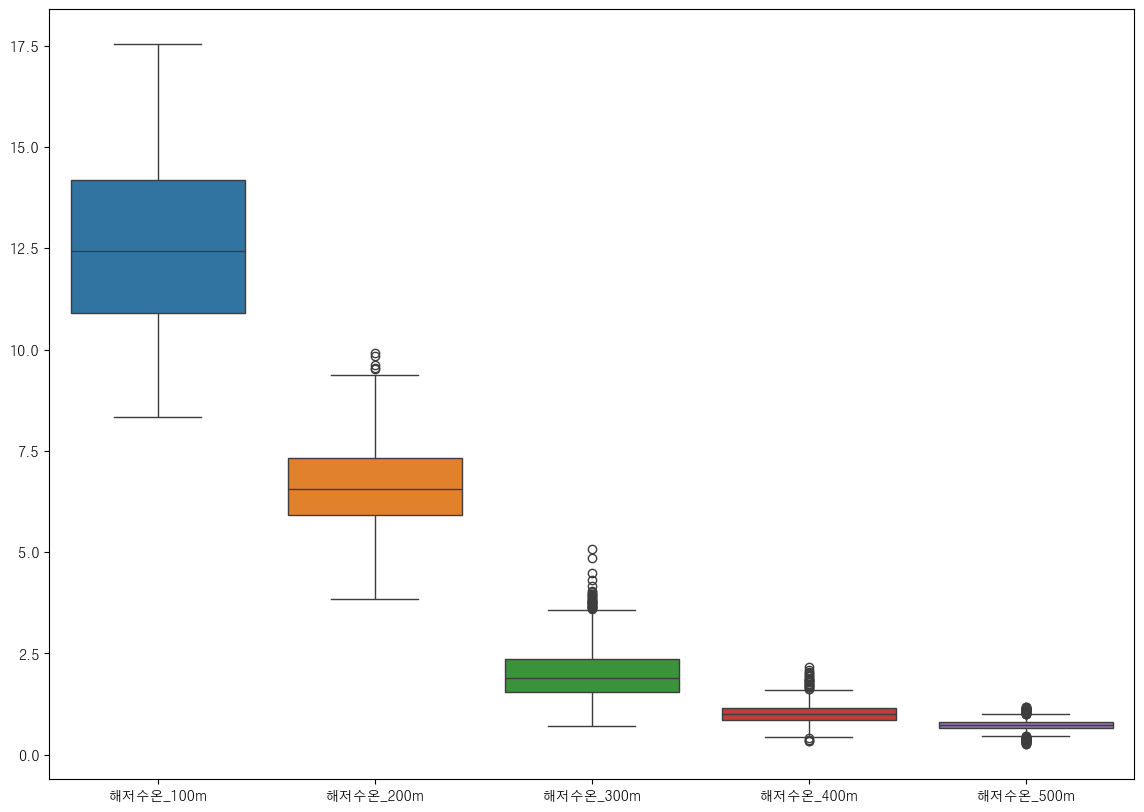

In [50]:
plt.figure(figsize=(14,10))
sns.boxplot(data=col4)
plt.show()

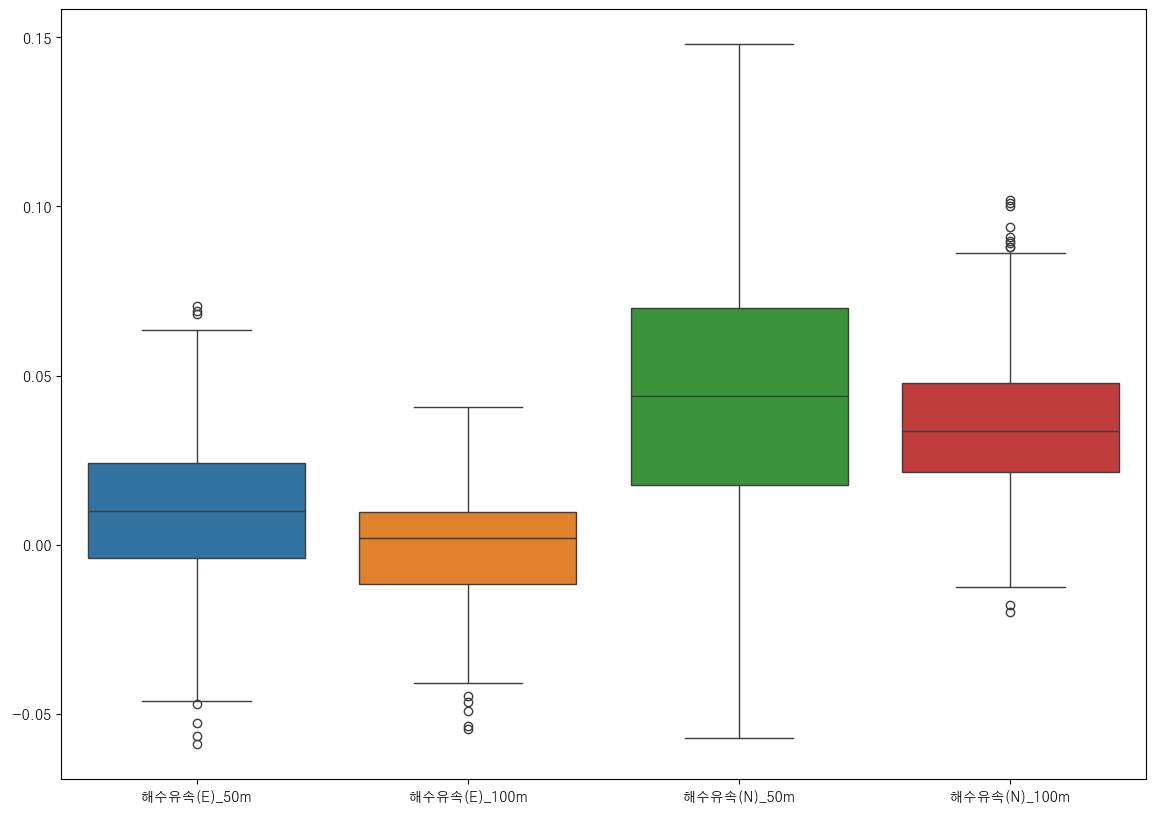

In [51]:
plt.figure(figsize=(14,10))
sns.boxplot(data=col5)
plt.show()

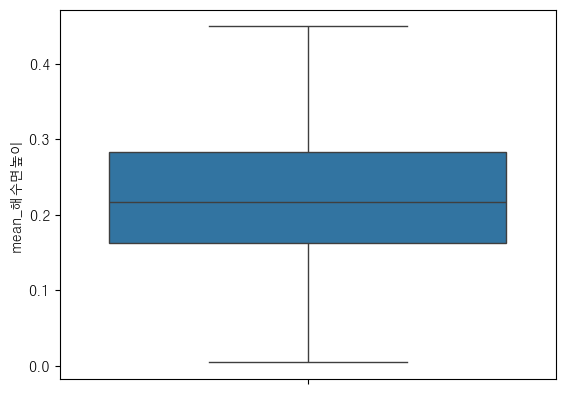

In [52]:
#plt.figure(figsize=(14,10))
sns.boxplot(data=col6)
plt.show()

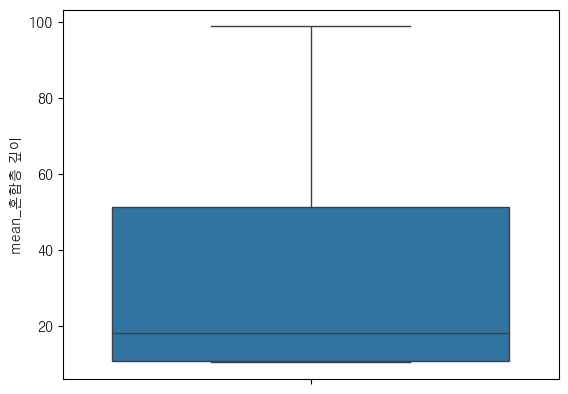

In [53]:
#plt.figure(figsize=(14,10))
sns.boxplot(data=col7)
plt.show()

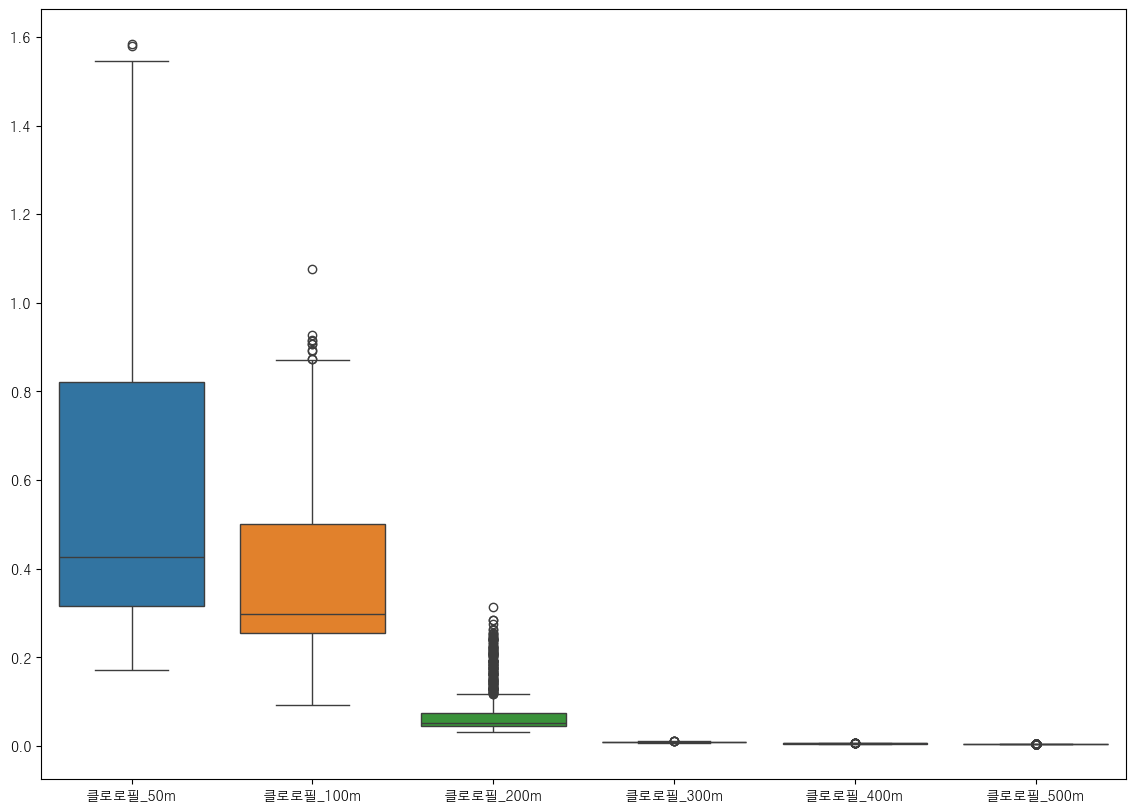

In [55]:
plt.figure(figsize=(14,10))
sns.boxplot(data=col8)
plt.show()

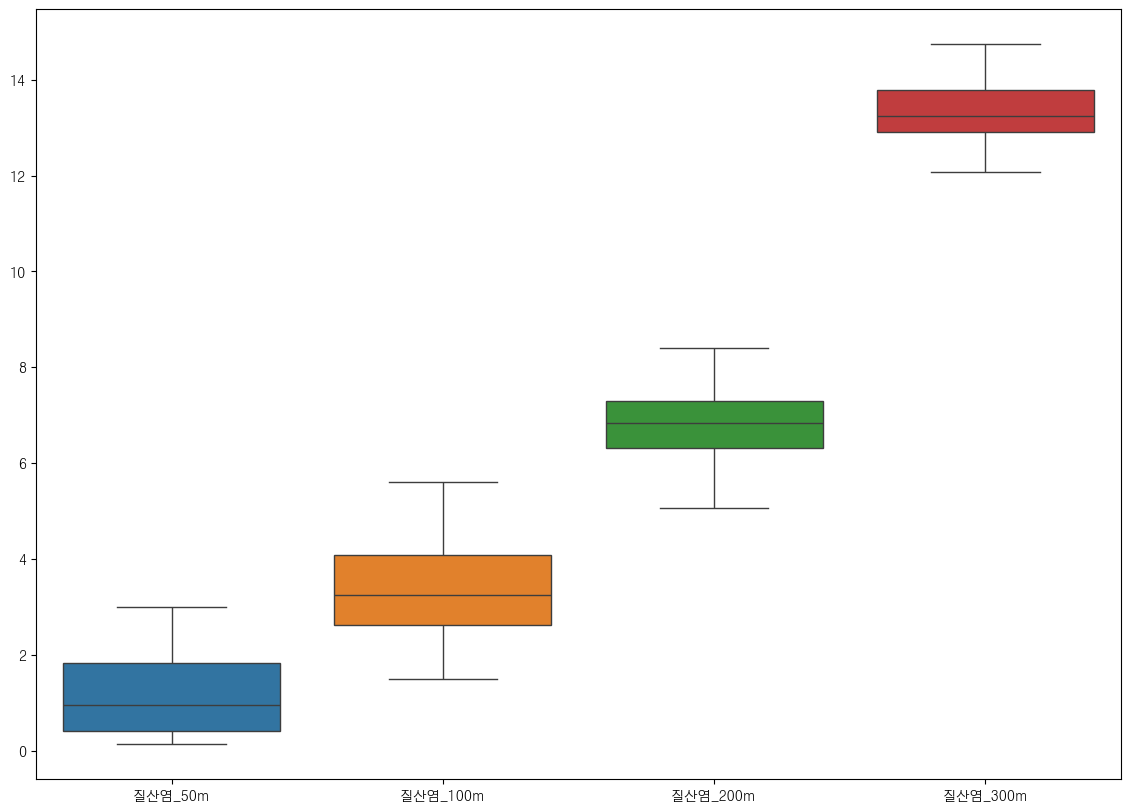

In [56]:
plt.figure(figsize=(14,10))
sns.boxplot(data=col9)
plt.show()

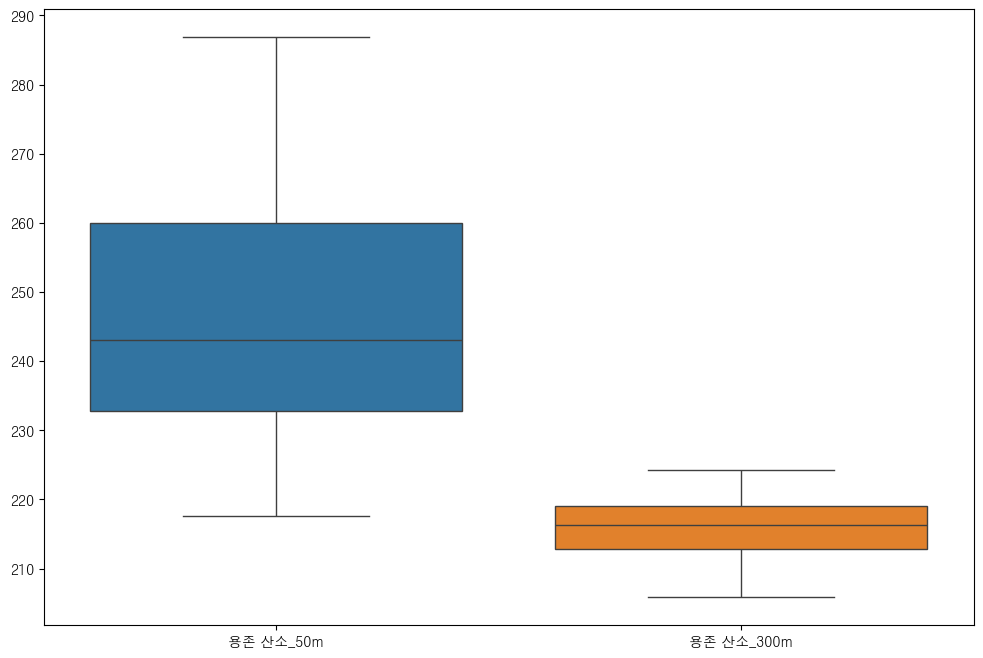

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col10)
plt.show()

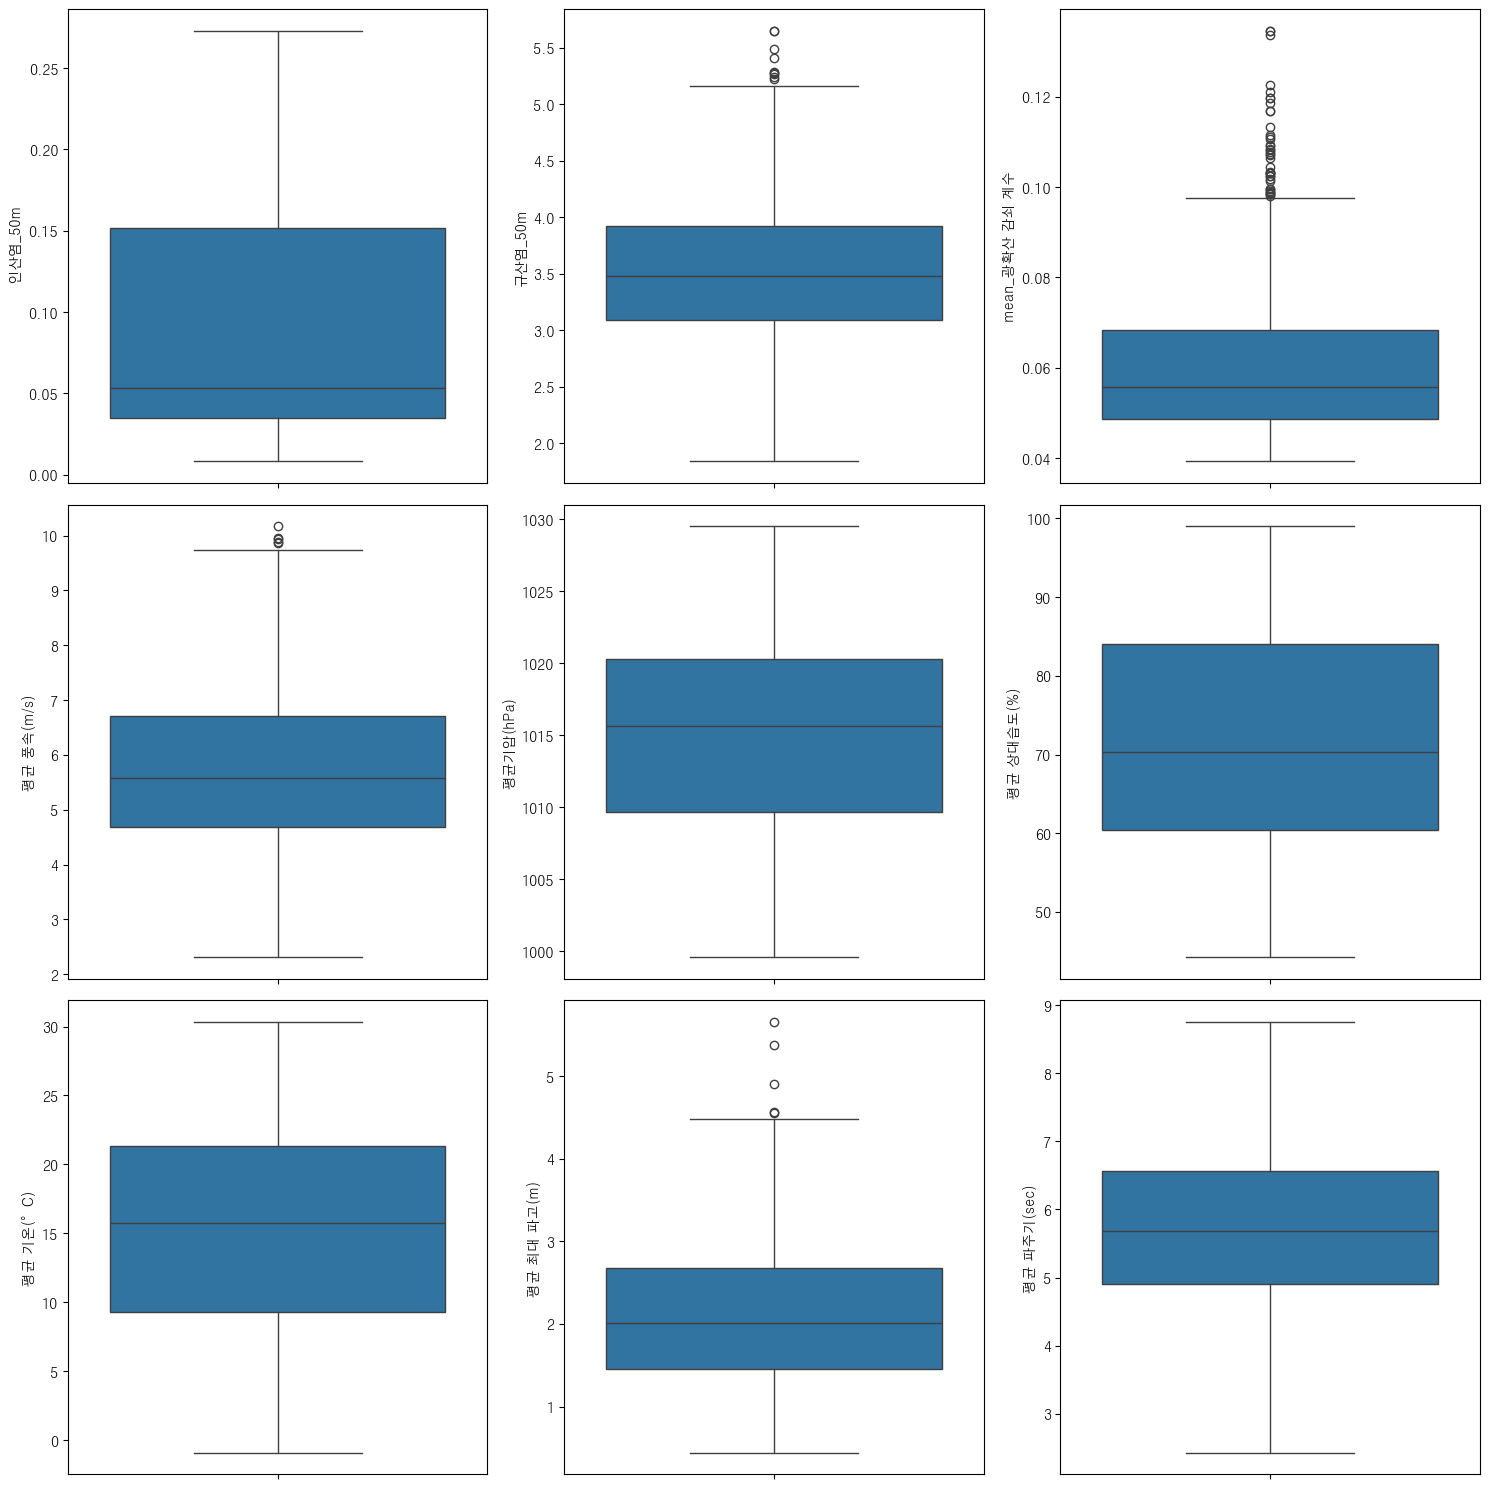

In [59]:
# '인산염_50m', '규산염_50m', 'mean_광확산 감쇠 계수','평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 최대 파고(m)','평균 파주기(sec)'
col_list=[' 인산염_50m', '규산염_50m', 'mean_광확산 감쇠 계수','평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 최대 파고(m)','평균 파주기(sec)']
data=rate_ocean_final

fig,axes=plt.subplots(3,3,figsize=(15,15))

for i, col in enumerate(col_list) :
    row=i//3
    col_sub=i%3
    sns.boxplot(data=data[col],ax=axes[row][col_sub])

plt.tight_layout()
plt.show()

In [ ]:
##### line plot ######

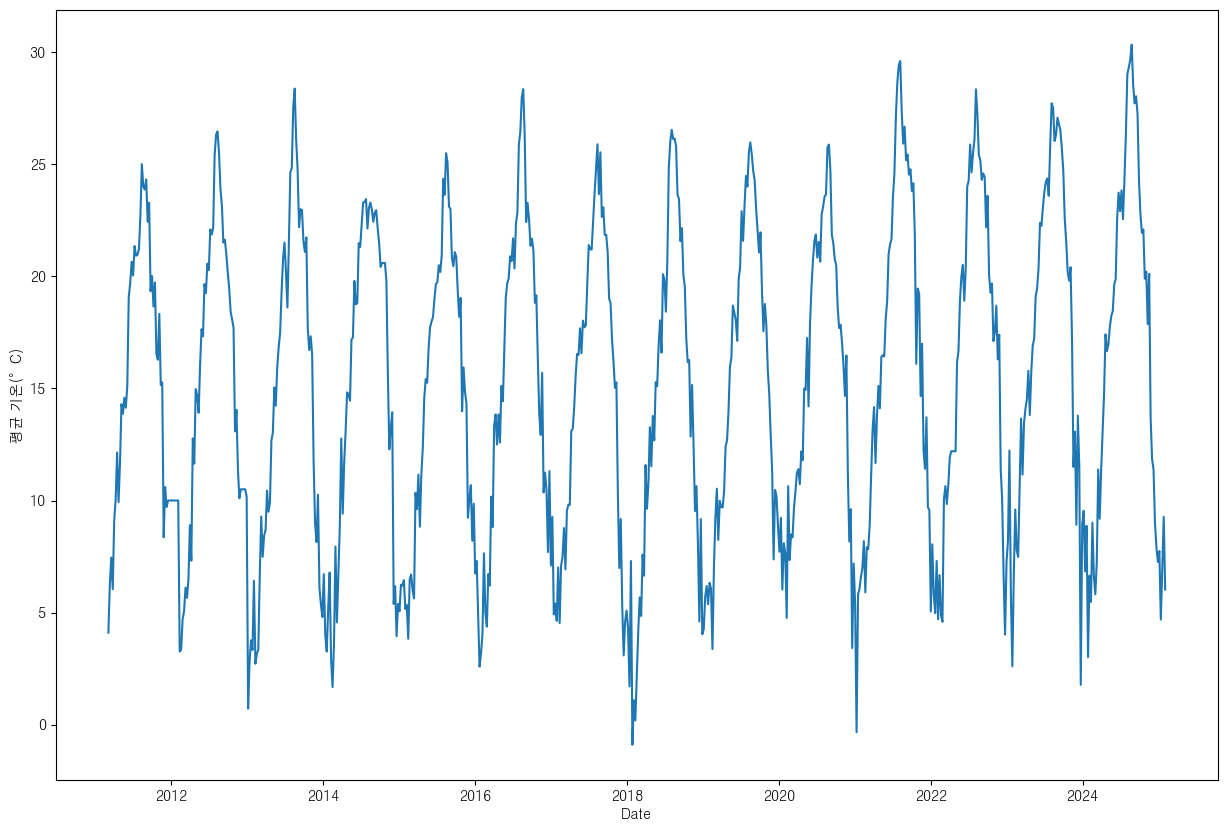

In [64]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data[col_list[6]])
plt.show()

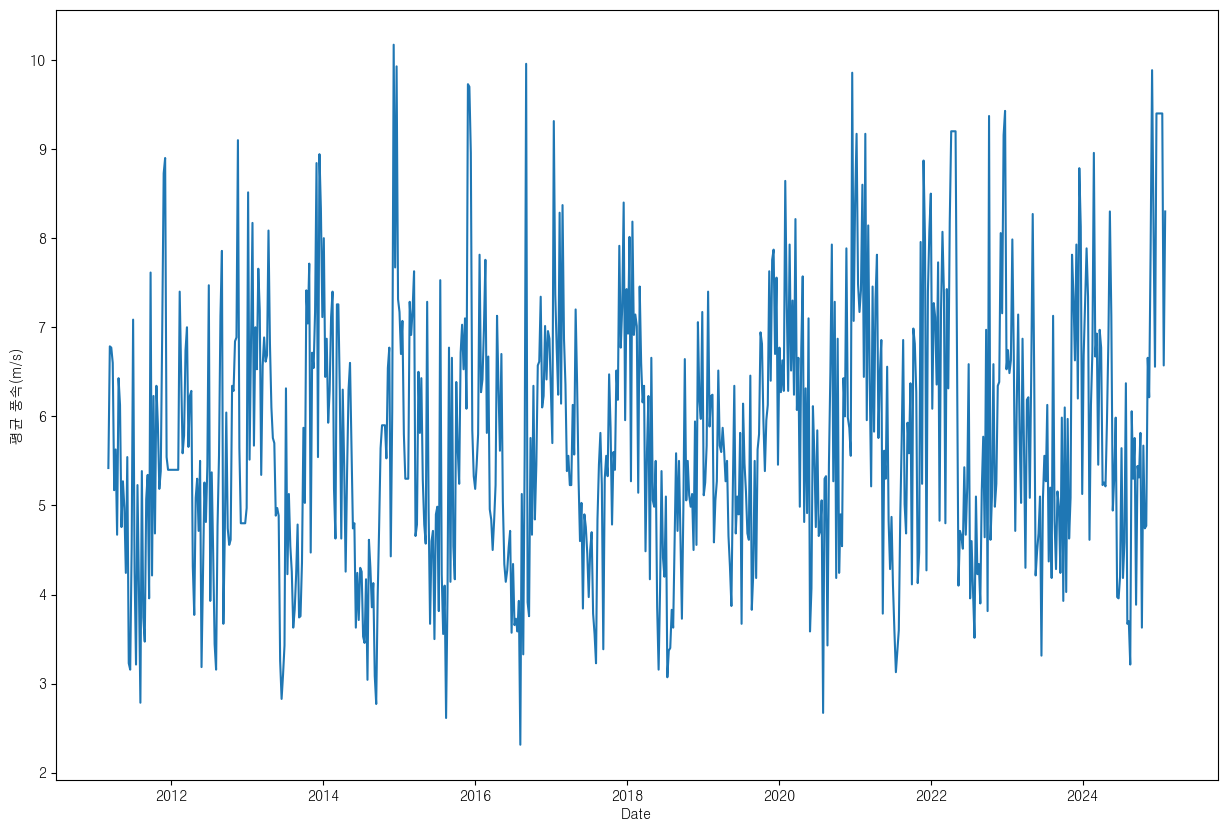

In [65]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data[col_list[3]])
plt.show()

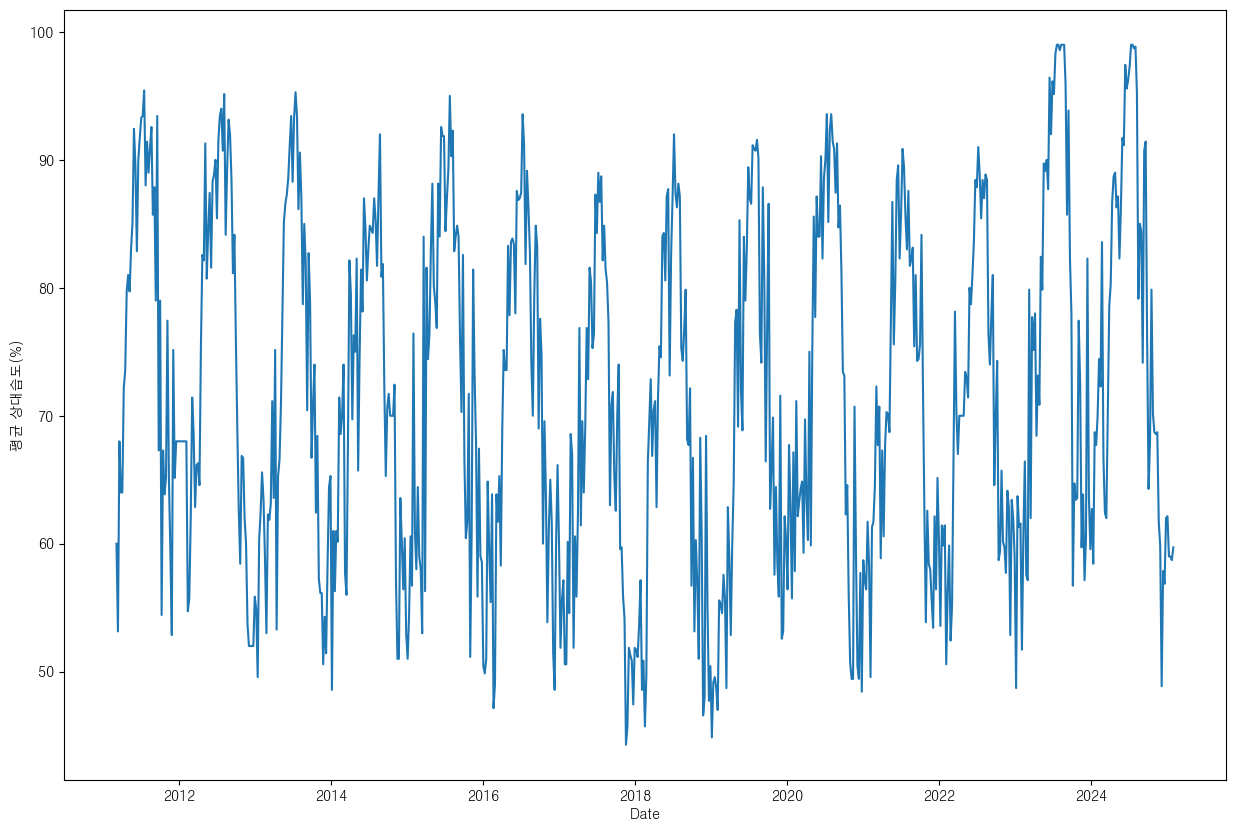

In [66]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data[col_list[5]])
plt.show()

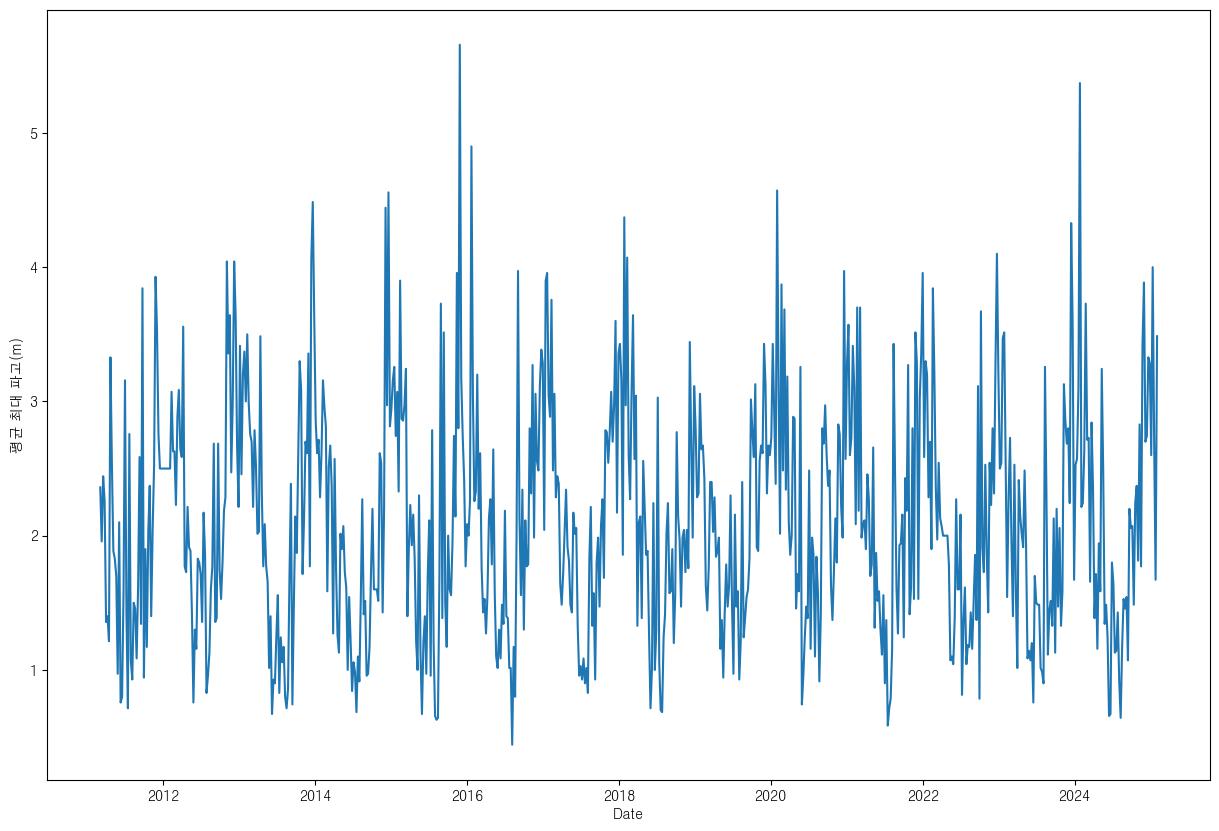

In [67]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data[col_list[7]])
plt.show()

In [ ]:
# plt.figure(figsize=(10,6))

# sns.lineplot(data=rate_ocean_final, x=rate_ocean_final.index, y=' 총어획량 ' , label=' 총어획량', color='red')
# sns.lineplot(data=rate_ocean_final, x=rate_ocean_final.index, y='평균 기온(°C)',label='평균기온',color='blue')
# plt.show()

ValueError: Could not interpret value ` 총어획량 ` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>